# 480 Homework#2 Jeremy Hook
# Question 4

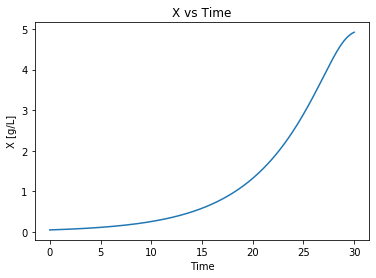

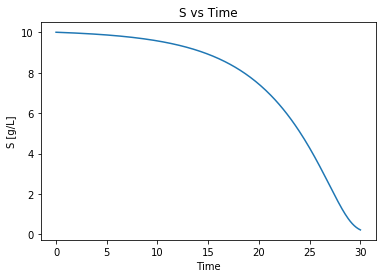

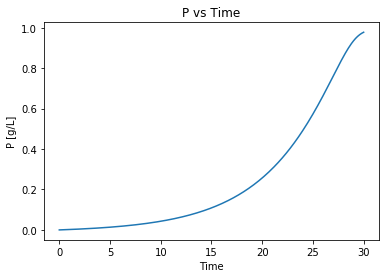

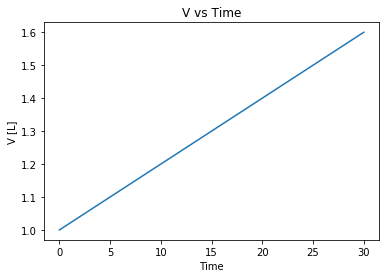

In [75]:
import matplotlib as plt
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Given INFO
X0 = .05
S0 = 10
P0 = 0
V0 = 1
initialconditions = [V0,X0,P0,S0]

mu = 0.2
Ks = 1
Yxs = .5
Ypx = .2
Yps = np.inf
Sf = 10 
F = 0.02
#Time over 30 seconds
t = np.linspace(0,30,300)   

def dydt(y, t):
    (V, VX, PV, SV) = y
    S = SV/V
    X = VX/V 
    dVdt = F
    dVXdt = V*(X*mu*S/(Ks + S))
    dPVdt = V*(Ypx*mu*S/(Ks + S))*X
    dSVdt = F*Sf - (V/Yxs)*mu*(S/(Ks + S))*X
    return [dVdt,dVXdt, dPVdt,dSVdt]

soln = odeint(dydt, initialconditions, t)

V = soln[:, 0]
X = soln[:, 1]/soln[:, 0]
P = soln[:, 2]/soln[:, 0]
S = soln[:, 3]/soln[:, 0]


plt.figure()
plt.plot(t,X)
plt.title('X vs Time')
plt.ylabel('X [g/L]')
plt.xlabel('Time')
plt.show()

plt.plot(t,S)
plt.title('S vs Time')
plt.ylabel('S [g/L]')
plt.xlabel('Time')
plt.show()

plt.plot(t,P)
plt.title('P vs Time')
plt.ylabel('P [g/L]')
plt.xlabel('Time')
plt.show()
plt.plot(t,V)
plt.title('V vs Time')
plt.ylabel('V [L]')
plt.xlabel('Time')
plt.show()

Optimum Feed Rate
0.06020160869565218 L/hr
Optimum Reaction Time
33.22170359451611 Hours
Maximum Rate of Production
0.08700505992120683 g/hr


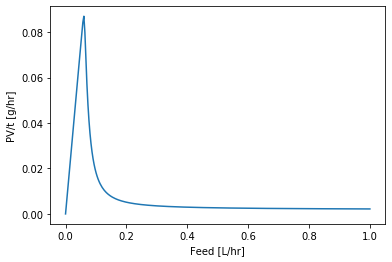

In [76]:
#Given INFO
X0 = .05
S0 = 10
P0 = 0
V0 = 1
mu = 0.2
Ks = 1
Yxs = .5
Ypx = .2
Yps = np.inf
Sf = 10 
F = 0.02
#Time over 30 seconds
t = np.linspace(0,30,300)  


feedrate = np.linspace(0.000001,1,300)
productrate = []
Vmax =3

def optimize(x,t,F):
    (V,VX,PV,SV) = x
    S = SV/V
    X = VX/V
    
    # COPIED INFO FROM EARLIER
    dVdt = F
    dVXdt = V*(X*mu*S/(Ks + S))
    dPVdt = V*(Ypx*mu*S/(Ks + S))*X
    dSVdt = F*Sf - (V/Yxs)*mu*(S/(Ks + S))*X
    
    return (dVdt,dVXdt, dPVdt, dSVdt)

for F in feedrate:
    tmax = (Vmax-V0)/F
    initialconditions = [V0,X0,P0,S0]
    t = np.linspace(0,tmax,300)
    soln = odeint(optimize, initialconditions, t, args=(F,))
    PV = soln[:,2]
    rate = PV[-1]/tmax
    productrate.append(rate)
    
    

maximizedproduct = np.max(productrate)
optimizedfeed = feedrate[np.argmax(productrate)]
rxntime = (Vmax-V0)/optfeed

plt.plot(feedrate,productrate)
plt.ylabel('PV/t [g/hr]')
plt.xlabel('Feed [L/hr]')
print('Optimum Feed Rate')
print(optimizedfeed, 'L/hr')
print('Optimum Reaction Time')
print(rxntime, 'Hours')
print('Maximum Rate of Production')
print(maximizedproduct, 'g/hr')
